In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

%matplotlib inline
pd.plotting.register_matplotlib_converters()
%config InlineBackend.figure_format = 'svg'

In [101]:
pd.set_option('max_rows', 20)
plt.rcParams.update({'font.size': 10})  # размер шрифта на графиках

In [102]:
# функция сжатия данных
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


### Загружаем данные из файлов и сжимаем их объем

In [103]:
dataset_path = pd.read_csv("/home/user/lesson_files/train.csv")
data = reduce_mem_usage(dataset_path)

dataset_test = pd.read_csv("/home/user/lesson_files/test.csv")
data_test = reduce_mem_usage(dataset_test)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%
Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.22 MB
Decreased by 70.3%


### Ознакамление с данными тренировочного файла. Поиск и исправление выбросов

In [104]:
# Проверяем содержат ли столбцы значения NaN. 
#В данном случае видим, что все строки кроме LifeSquare  и Healthcare_1 заполнены
data.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [105]:
# Выше увидели что в LifeSquare заполнены не все строки, проверяем корректно ли заполнены остальные.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839522,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315720,21.058716,1.136859,41.774879,52.513309,65.900627,6.410652e+02
LifeSquare,7887.0,37.199665,86.241219,0.370619,22.769833,32.781261,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560839,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.776200,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218670e-01


In [106]:
#заменяю средним значением значения в столбце LifeSquare < 12. 12- интуитивно выбранная мин площадь
medium_LifeSquare = data["LifeSquare"].mean()
data.loc[data["LifeSquare"] < 12, "LifeSquare"] = medium_LifeSquare
data.describe().transpose()

# также в данном столбце содержатся значения NaN (пустые), заменим их тоже
data.LifeSquare.fillna(medium_LifeSquare, inplace=True)


In [107]:
# также было видно что в столбце KitchenSquare встречаются сомнительно малые площади, заменим все что меньше 4
# средним значением значением
medium_KitchenSquare = data["KitchenSquare"].mean()
data.loc[data["KitchenSquare"] < 4, "KitchenSquare"] = medium_KitchenSquare

In [108]:
# в таблице также было видно что с годом постройки домов у некоторых строк некорректные значения. 
data.loc[data["HouseYear"] > 2021]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.0,44.791836,28.360394,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.609375
9163,10814,109,1.0,37.265072,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.531250


In [109]:
# заменим все что старше 2021 на медиану, но медиану посчитаем без учета этих двух выбросов:
not_correct_data = data.loc[data["HouseYear"] > 2021]
true_data_year = data.drop([1497, 4189], axis=0, inplace=False)
data.loc[data["HouseYear"] > 2021, 'HouseYear'] = true_data_year["HouseYear"].mean()
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,16798.000000
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,209.000000
Rooms,10000.0,1.890500,0.839522,0.000000,1.000000,2.000000,2.000000,19.000000
Square,10000.0,56.315720,21.058716,1.136859,41.774879,52.513309,65.900627,641.065186
LifeSquare,10000.0,37.913849,76.428604,12.125029,27.719868,37.199665,41.427234,7480.592285
KitchenSquare,10000.0,8.016732,28.338360,4.000000,6.273300,6.273300,9.000000,2014.000000
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,42.000000
HouseFloor,10000.0,12.609400,6.776200,0.000000,9.000000,13.000000,17.000000,117.000000
HouseYear,10000.0,1985.266514,33.814287,1910.000000,1974.000000,1977.000000,2001.000000,3990.571614
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,0.521867


In [110]:
# c количеством комнат в данных тоже ошибки - встречается 0. Вот эти строки
data.loc[data["Rooms"] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2194,3159,88,0.0,38.697117,19.345131,9.0000,9,16.0,1982.0,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.109375
3780,7317,27,0.0,41.790882,37.199665,6.2733,13,0.0,1977.0,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976562
5894,770,28,0.0,49.483501,37.199665,6.2733,16,0.0,2015.0,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.343750
6401,9443,27,0.0,87.762619,85.125473,6.2733,5,15.0,1977.0,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.921875
7644,7917,27,0.0,212.932358,211.231125,6.2733,2,3.0,2008.0,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.250000
7929,456,6,0.0,81.491447,37.199665,6.2733,4,0.0,1977.0,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.796875
9767,12638,27,0.0,138.427689,136.215500,6.2733,4,3.0,2016.0,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.750000
9869,3224,27,0.0,2.377248,37.199665,6.2733,1,0.0,1977.0,0.017647,B,B,2,469,0,NaN,0,0,B,126596.945312


In [111]:
# Чтобы корректно исправить кол-во комнат ориентироваться будем на площадь -  Square.
# В данном случае встречаются дома с 0 комнат с площадью от 0 до 50, от 50 до 90 и свыше 90. 
# Вычисляю для каждой группы среднее значение кол-ва комнат и заменю в строках где 0 комнат в зависимости от площади.
medium_50 = round(data.loc[(data["Square"] > 30) & (data["Square"] < 50), 'Rooms'].mean())
medium_50_90 = round(data.loc[(data["Square"] > 49) & (data["Square"] < 90), 'Rooms'].mean())
medium_100 = round(data.loc[data["Square"] > 100, 'Rooms'].mean())

# в строке 3224 можно и вручную исправить, в остальных правлю через метод .loc
data.loc[data["Id"] == 3224, 'Rooms'] = 1
data.loc[(data["Rooms"] == 0) & ((data["Square"] > 30) & (data["Square"] < 50)), 'Rooms'] = medium_50
data.loc[(data["Rooms"] == 0) & ((data["Square"] > 49) & (data["Square"] < 90)), 'Rooms'] = medium_50_90
data.loc[(data["Rooms"] == 0) & (data["Square"] > 100), 'Rooms'] = medium_100

In [112]:
# проверяем результат
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,16798.000000
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,209.000000
Rooms,10000.0,1.891900,0.838142,1.000000,1.000000,2.000000,2.000000,19.000000
Square,10000.0,56.315720,21.058716,1.136859,41.774879,52.513309,65.900627,641.065186
LifeSquare,10000.0,37.913849,76.428604,12.125029,27.719868,37.199665,41.427234,7480.592285
KitchenSquare,10000.0,8.016732,28.338360,4.000000,6.273300,6.273300,9.000000,2014.000000
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,42.000000
HouseFloor,10000.0,12.609400,6.776200,0.000000,9.000000,13.000000,17.000000,117.000000
HouseYear,10000.0,1985.266514,33.814287,1910.000000,1974.000000,1977.000000,2001.000000,3990.571614
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,0.521867


In [113]:
# В некоторых колонках встречаются нули, нужно исправить:
data.loc[data["DistrictId"] == 0, "DistrictId"] = round(data["DistrictId"].std())
data.loc[data["HouseFloor"] == 0, "HouseFloor"] = round(data["HouseFloor"].std())
data.loc[data["Ecology_1"] == 0, "Ecology_1"] = round(data["Ecology_1"].std())
data.loc[data["Social_1"] == 0, "Social_1"] = round(data["Social_1"].std())
data.loc[data["Social_3"] == 0, "Social_3"] = round(data["Social_3"].mean())
data.loc[data["Helthcare_2"] == 0, "Helthcare_2"] = round(data["Helthcare_2"].mean())
data.loc[data["Shops_1"] == 0, "Shops_1"] = round(data["Shops_1"].mean())

### Построение графиков

#### Построение графика распределения целевой переменной Price

/home/user/Work/Anaconda_3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


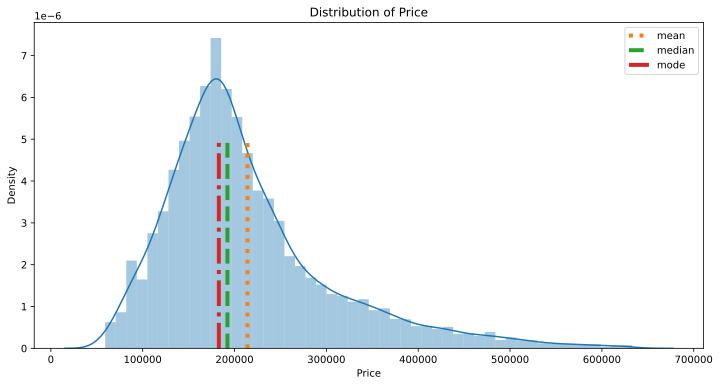

In [114]:
# задаю переменные
target_mean = round(data['Price'].mean(), 2)
target_median = data['Price'].median()
target_mode = data['Price'].mode()[0]

# строим график
plt.figure(figsize = (12, 6))

sns.distplot(data['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()


#### Cмотрим с каким кол-вом квартир домов больше всего

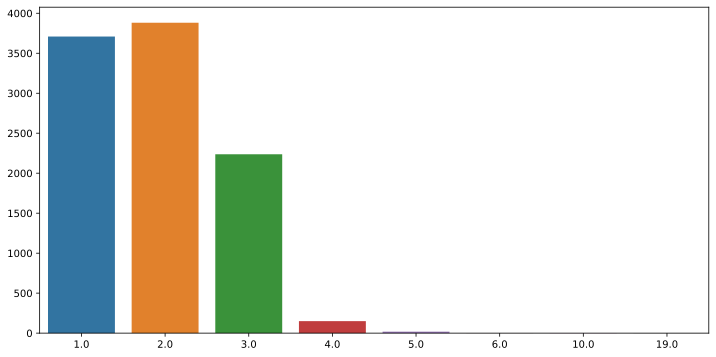

In [115]:
w = data.groupby('Rooms').agg({'Rooms': ['count']})
ww = list(w.index)
www = list(w['Rooms', 'count'])


plt.figure(figsize = (12, 6))
sns.barplot(x=ww, y=www)

data_test.loc[data_test["LifeSquare"] < 12, "LifeSquare"] = medium_LifeSquare

data_test.LifeSquare.fillna(medium_LifeSquare, inplace=True)


#### Проверяем данные из тестового файла, где нужно будет предсказать цену.

In [116]:
data_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838586,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449512,19.092773,1.378543,41.906230,52.921339,66.285130,223.453690
LifeSquare,5000.0,37.140079,15.056705,12.234303,28.029077,37.199665,41.769526,303.071106
KitchenSquare,5000.0,5.976800,9.950069,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789165,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


In [117]:
# будем считать что заполенные данные тестового файла в порядке

# смотрим все ли строки заполнены (Healthcare_1 решено игнорировать)
data_test.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

### Построение модели

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score as r2


x_values = data.loc[:,['DistrictId','Rooms','Square', 'LifeSquare', 'KitchenSquare','Floor', 'HouseFloor', 'HouseYear', 'Ecology_1','Social_1','Social_2', 'Social_3', 'Helthcare_2','Shops_1']]

y = pd.DataFrame(data.pop('Price'))

X_train, X_test, y_train, y_test = train_test_split(x_values, y, test_size=0.30, random_state=42)

gb_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=6,
                                        min_samples_leaf=10,
                                        random_state=42,
                                        n_estimators=200)

gb_model.fit(X_train, np.ravel(y_train,order='C'))  # если указать вторым аргументом y_train, будет ошибка векторов


print("Правильность на обучающем наборе: {:.2f}".format(gb_model.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(gb_model.score(X_test, y_test)))

Правильность на обучающем наборе: 0.91
Правильность на контрольном наборе: 0.74


### Предсказываю цену для данных из файла test.csv (data_test)

In [119]:
# выбираю столбцы(признаки) загруженного с физ. файла тестового датафрейма
data_test2 = data_test.loc[:,['DistrictId','Rooms','Square', 'LifeSquare', 'KitchenSquare','Floor', 'HouseFloor', 'HouseYear', 'Ecology_1','Social_1','Social_2', 'Social_3', 'Helthcare_2','Shops_1']]

# предсказываю
preds = gb_model.predict(data_test2)

# записываю предсказание цены в отдельный объект
data_test2['Price'] = preds.flatten()
data_test2

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
0,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,24,4378,0,1,1,165964.927581
1,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,2,629,1,0,0,124355.392919
2,27,2.0,59.463676,37.199665,9.0,19,19.0,1977,0.211401,9,1892,0,0,1,162208.184762
3,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,2,475,0,0,0,129964.588605
4,74,1.0,53.837055,37.199665,1.0,8,17.0,1977,0.309479,35,7715,4,0,6,197906.331949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,31,6119,4,1,2,177359.696255
4996,38,3.0,93.698120,94.521461,10.0,21,27.0,2018,0.060753,15,2787,2,0,7,369010.286650
4997,101,1.0,33.656723,19.003260,5.0,2,5.0,1966,0.038693,28,6533,1,2,5,147296.503317
4998,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,33,7976,5,0,11,189447.947498


### Сохраняем предсказания

In [128]:
data_test2['Id'] = data_test2.index
data_test2.loc[:,['Id', 'Price']].to_csv('/home/user/lesson_files/Kakorin_predictions.csv ', index=False)